<a href="https://colab.research.google.com/github/hsyoongh/hg-mldl/blob/master/Sinogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

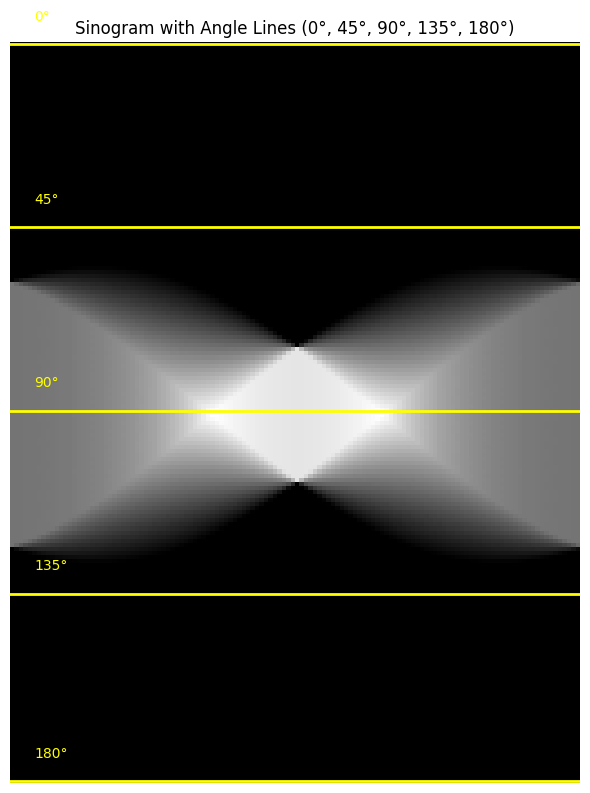

In [2]:
# ✅ 필요한 라이브러리 설치 (Colab엔 보통 기본 설치돼 있음)
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle
from skimage.transform import radon

# ✅ 1. Phantom 이미지 만들기 (흰 사각형)
image = np.zeros((128, 128), dtype=np.float32)
rr, cc = rectangle(start=(48, 32), end=(80, 96))
image[rr, cc] = 1.0

# ✅ 2. Radon Transform (Sinogram 생성)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=False)

# ✅ 3. 특정 각도 위치 계산 (0°, 45°, 90°, 135°, 180°)
height = sinogram.shape[0]
angle_marks = [0, 45, 90, 135, 180]
rows = [int((angle / 180) * (height - 1)) for angle in angle_marks]

# ✅ 4. 시각화
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(sinogram, cmap='gray', aspect='auto')
for row, angle in zip(rows, angle_marks):
    ax.axhline(y=row, color='yellow', linewidth=2)
    ax.text(5, row - 5, f'{angle}°', color='yellow', fontsize=10, verticalalignment='bottom')

ax.set_title("Sinogram with Angle Lines (0°, 45°, 90°, 135°, 180°)")
ax.axis('off')
plt.tight_layout()
plt.show()

